# Q1

## Q1-a

In [4]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

In [5]:
data_a = sio.loadmat('q1a.mat')['a']
data_b = sio.loadmat('q1a.mat')['b']
data_a = data_a.reshape(len(data_a),)
data_b = data_b.reshape(len(data_b),)
print data_a.shape
print data_b.shape

(200,)
(40,)


In [6]:
def gaussian(u):
    return (1 /  np.square(np.pi * 2)) * np.exp(-0.5 * (np.power(u,2)))
def prob(x, X, h):
    N = len(X)
    sum = 0.0
    for xt in X:
        sum += gaussian((x-xt)/h)
    return (1/(N * h)) * sum

In [34]:
def plot_kde(data, h):
    X_a = np.sort(data[0])
    X_a = np.append(np.arange(-10, X_a[0], 0.1), X_a)
    X_a = np.append(X_a, np.arange(X_a[len(X_a)-1], 6, 0.1))
    Y_a = []
    for x in X_a:
        Y_a.append(prob(x, data[0], h))
    X_b = np.sort(data[1])
    X_b = np.append(np.arange(-10, X_b[0], 0.1), X_b)
    X_b = np.append(X_b, np.arange(X_b[len(X_b)-1], 6, 0.1))
    Y_b = []
    for x in X_b:
        Y_b.append(prob(x, data[1], h))
    plt.plot(X_a, Y_a, 'b', X_b, Y_b, 'r')

In [47]:
def plot_prob(data, h):
    X_a = np.sort(data[0])
    X_a = np.append(np.arange(-10, X_a[0], 0.1), X_a)
    X_a = np.append(X_a, np.arange(X_a[len(X_a)-1], 6, 0.1))
    Y_a = []
    for x in X_a:
        p_x_c = prob(x, data[0], h)
        p_c = len(data[0]) / (len(data[0]) + len(data[1]))
        p_x = prob(x, np.append(data[0], data[1]), h)
        Y_a.append((p_x_c * p_c) / p_x)
    X_b = np.sort(data[1])
    X_b = np.append(np.arange(-10, X_b[0], 0.1), X_b)
    X_b = np.append(X_b, np.arange(X_b[len(X_b)-1], 6, 0.1))
    Y_b = []
    for x in X_b:
        p_x_c = prob(x, data[1], h)
        p_c = len(data[1]) / (len(data[0]) + len(data[1]))
        p_x = prob(x, np.append(data[0], data[1]), h)
        Y_b.append((p_x_c * p_c) / p_x)
    plt.plot(X_a, Y_a, 'b', X_b, Y_b, 'r')

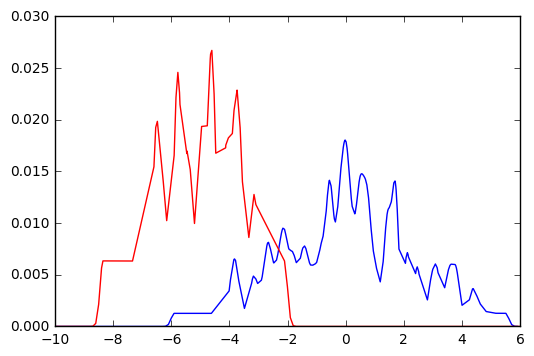

In [48]:
plot_kde([data_a, data_b], 0.1)

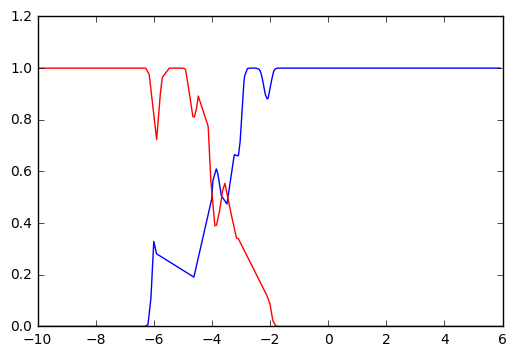

In [49]:
plot_prob([data_a, data_b], 0.1)

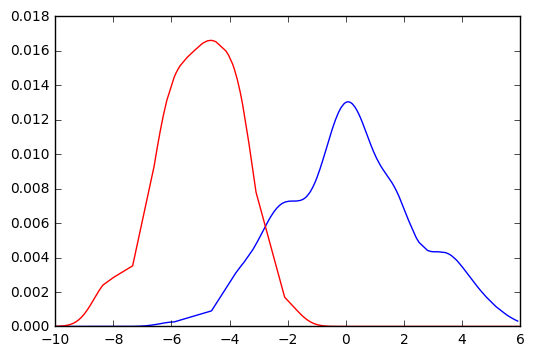

In [50]:
plot_kde([data_a, data_b], 0.5)

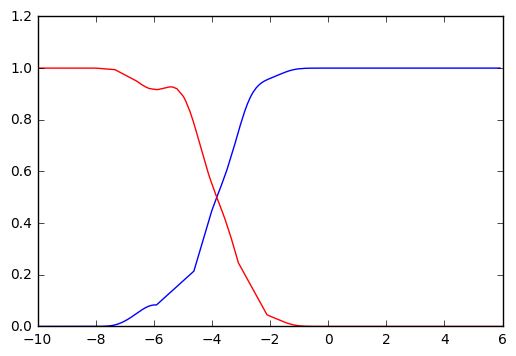

In [52]:
plot_prob([data_a, data_b], 0.5)

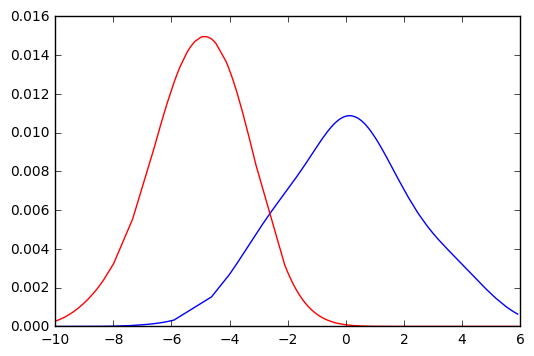

In [51]:
plot_kde([data_a, data_b],1)

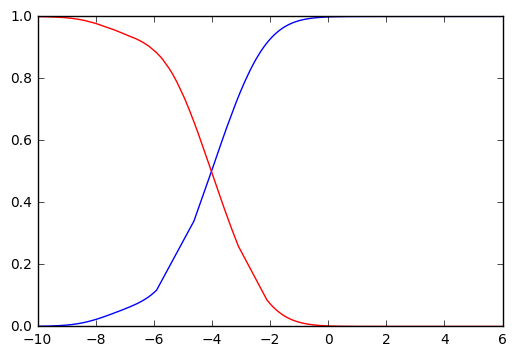

In [53]:
plot_prob([data_a, data_b],1)

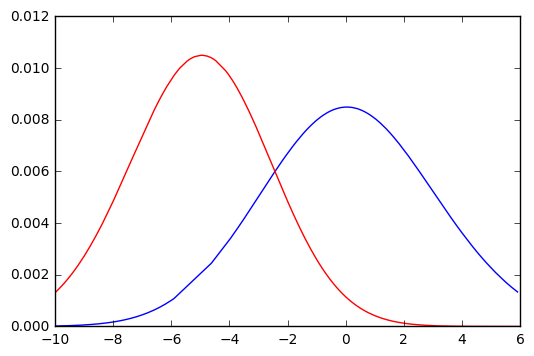

In [38]:
plot_kde([data_a, data_b], 2)

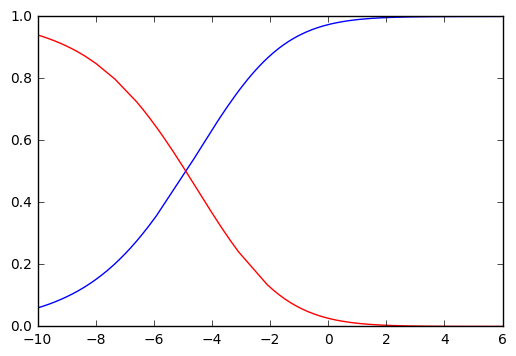

In [54]:
plot_prob([data_a, data_b], 2)

## Q1-b

In [73]:
data_a = sio.loadmat('q1b.mat')['a']
data_b = sio.loadmat('q1b.mat')['b']
print data_a.shape
print data_b.shape

 (200, 2)
(40, 2)


In [80]:
data = np.append(data_a, data_b, axis=0)

In [81]:
def gaussian(u):
    return (1 /  np.square(np.pi * 2)) * np.exp(-0.5 * (np.power(u,2)))
def prob(x, X, h):
    N = len(X)
    sum = 0.0
    for xt in X:
        sum += gaussian(np.sqrt((x[0] - xt[0])**2 + (x[1] - xt[1])**2)/h)
    return (1/(N * (h**2))) * sum
def prob_c(x, data, h, c):
    p_x_c = prob(x, data[c], h)
    p_c = len(data[c]) / (len(data[0]) + len(data[1]))
    p_x = prob(x, np.append(data[0], data[1], axis=0), h)
    return(p_x_c * p_c) / p_x
    

In [82]:
print 'prob(c=0|x) = ', prob_c([-10, 10], [data_a, data_b], 2, 0)
print 'prob(c=1|x) = ', prob_c([-10, 10], [data_a, data_b], 2, 1)

prob(c=0|x) =  0.97424372234
prob(c=1|x) =  0.0257562776595


## Q1-c

### Sample Covariance Matrix S:

In [83]:
m = np.sum(data, axis = 0)/data.shape[0]
print m
S =   np.dot( (data - m).T, (data - m))/data.shape[0]
print S

[-0.38738619  0.28663302]
[[ 4.083387    2.42796898]
 [ 2.42796898  3.54047196]]


In [84]:
def gaussian(u):
    return (1 /  np.square((np.pi * 2)**2 * np.linalg.det(S))) * np.exp(-0.5 * np.dot(np.dot(u, np.linalg.inv(S)), u.T))
def prob(x, X, h):
    N = len(X)
    sum = 0.0
    for xt in X:
        sum += gaussian(np.sqrt(np.array([np.sqrt((x[0]-xt[0])**2), np.sqrt((x[1]-xt[1])**2) ])/h))
    return (1/(N * (h**2))) * sum
def prob_c(x, data, h, c):
    p_x_c = prob(x, data[c], h)
    p_c = len(data[c]) / (len(data[0]) + len(data[1]))
    p_x = prob(x, np.append(data[0], data[1], axis=0), h)
    return(p_x_c * p_c) / p_x

In [85]:
print 'prob(c=0|x) = ', prob_c([-10, 10], [data_a, data_b], 2, 0)
print 'prob(c=1|x) = ', prob_c([-10, 10], [data_a, data_b], 2, 1)

prob(c=0|x) =  0.854894056688
prob(c=1|x) =  0.145105943312


# Q2

In [126]:
data = sio.loadmat('q2.mat')['d']
print data.shape

(2000, 3)


In [133]:
import math
import random

def sigmoid(x):
    try:
        res =  1 / (1 + math.exp(-x))
    except:
        print 'error in sigmoid: ', x
        res = 0
    return res
def round_(x):
    t = sigmoid(x)
    if t >= 0.5:
        return 1
    else:
        return 0
def gradient_descent(train, test, learning_rate=0.01, max_iter=1000, plot=False):
    '''
    this function get train and test and learning rate as hyper-parameter.
    Then try to train model, until a convergence criteria reach or we pass max_iter
    and using trained model try to predict test and return us the accuracy of prediction
    '''
    w = (np.random.rand(1, train.shape[1])-0.5) / 50
    iter_count = 0
    train_accuracy = []
    test_accuracy = []
    while(True):
        o = np.concatenate([np.ones((train.shape[0], 1)), train[:,:2]], axis=1)
        t = np.dot(o, w.T)
        pred = np.apply_along_axis(sigmoid, 1, t)
        dw = np.dot(np.array(train[:,2] - pred), o) / train.shape[0]
        w += learning_rate * dw
        
        if plot:
            #train accuracy
            o = np.concatenate([np.ones((train.shape[0], 1)), train[:,:2]], axis=1)
            t = np.dot(o, w.T)
            pred = np.apply_along_axis(round_, 1, t)
            counter = 0.0
            for p, y in zip(pred, train[:,2]):
                if p == y:
                    counter += 1.0
            train_accuracy.append(counter/train.shape[0])
            #test accuracy
            o = np.concatenate([np.ones((test.shape[0], 1)), test[:,:2]], axis=1)
            t = np.dot(o, w.T)
            pred = np.apply_along_axis(round_, 1, t)
            counter = 0.0
            for p, y in zip(pred, test[:,2]):
                if p == y:
                    counter += 1.0
            test_accuracy.append(counter/ test.shape[0])

        iter_count += 1
        if iter_count == max_iter:
            break
    #prepare results
    o = np.concatenate([np.ones((test.shape[0], 1)), test[:,:2]], axis=1)
    t = np.dot(
    )
    pred = np.apply_along_axis(round_, 1, t)
    counter = 0.0
    for p, y in zip(pred, test[:,2]):
        if p == y:
            counter += 1.0
    return counter / test.shape[0], train_accuracy, test_accuracy   

## 10 fold cross validation

In [148]:
fold_num = 10

# create a random array of indeces
indeces = np.arange(len(data))
np.random.shuffle(indeces)

average = 0.0
accuracies = []
for k in range(fold_num):
    #create train and test datasets
    train = np.empty((0,3), float)
    test =np.empty((0,3), float)
    for i in range(len(data)):
        if i >= k * len(data)/fold_num and i < (k+1) * len(data)/fold_num:
            test = np.vstack((test ,data[indeces[i],:]))
        else:
            train = np.vstack((train ,data[indeces[i],:]))
    acc, t1, t2 = gradient_descent(train,test, learning_rate=0.01, max_iter=200)
    accuracies.append(acc)
    print '%', acc * 100
    average += float(acc) / fold_num
print 'average accuracy: %', average * 100
print 'std of accuracy: ', np.std(accuracies)

% 80.5
% 80.5
% 75.5
% 80.5
% 78.0
% 79.0
% 82.5
% 84.0
% 76.0
% 75.0
average accuracy: % 79.15
std of accuracy:  0.0286400069832


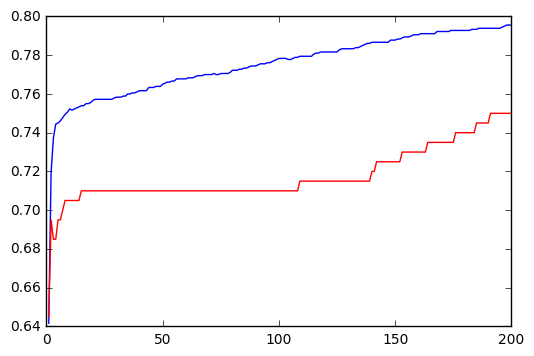

In [152]:
# running for last fold
acc, train_acc, test_acc = gradient_descent(train,test, learning_rate=0.01, max_iter=200, plot=True)
x = range(1, len(train_acc)+1)
plt.plot(x, train_acc, 'b', x, test_acc, 'r')